Title: Binary vs. Multi-Class Classification<br>

Task 1:<br>
Binary Classification: Predict if a website visitor will click a button (Click or No Click).<br>
Use a web visitor interaction dataset.<br>
Task: Implement binary classification for click prediction.

In [10]:
# Write your code here

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Create synthetic dataset simulating website visitor interactions
np.random.seed(42)
n_samples = 1000

# Features (example): time_on_site (seconds), pages_visited, referral_source (0=direct,1=search,2=ad)
time_on_site = np.random.exponential(scale=100, size=n_samples)  # time spent on site
pages_visited = np.random.poisson(lam=5, size=n_samples)        # number of pages visited
referral_source = np.random.choice([0,1,2], size=n_samples, p=[0.5, 0.3, 0.2])

# Target: whether user clicked the button (1) or not (0)
# Assume people with longer time, more pages, and ad referral more likely to click
click_prob = (
    0.02 * time_on_site +
    0.1 * pages_visited +
    0.15 * (referral_source == 2).astype(int)
)
click_prob = 1 / (1 + np.exp(- (click_prob - 3)))  # sigmoid to convert to probability

clicked = np.random.binomial(1, click_prob)

# Create DataFrame
df = pd.DataFrame({
    'time_on_site': time_on_site,
    'pages_visited': pages_visited,
    'referral_source': referral_source,
    'clicked': clicked
})

# Step 2: Preprocess data
X = df.drop('clicked', axis=1)
y = df['clicked']

# One-hot encode referral_source categorical variable
X = pd.get_dummies(X, columns=['referral_source'], drop_first=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train logistic regression classifier
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Click', 'Click']))


Accuracy: 0.8233

Classification Report:
              precision    recall  f1-score   support

    No Click       0.83      0.91      0.87       191
       Click       0.81      0.67      0.73       109

    accuracy                           0.82       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.82      0.82      0.82       300



Task 2:<br>
Multi-Class Classification: Recognize handwritten digits (0-9).<br>
Use the MNIST dataset.<br>
Task: Develop a model that correctly classifies each handwritten digit.<br>


In [11]:
# Write your code here

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load MNIST-like digits dataset (8x8 images)
digits = load_digits()

X = digits.data       # 64 features (8x8 pixel intensities)
y = digits.target     # Labels: digits 0-9

# Split data into train and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression for multi-class classification (default 'ovr' or 'multinomial')
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9815

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.95      0.95        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       0.98      0.98      0.98        54
           5       1.00      0.98      0.99        55
           6       1.00      0.98      0.99        54
           7       1.00      1.00      1.00        54
           8       0.91      0.94      0.92        52
           9       0.98      0.98      0.98        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Task 3:<br>
Multi-Class Classification: Classify a flower species based on petal and sepal measurements.<br>
Use the Iris dataset.<br>
Task: Use features to classify into three species: Setosa, Versicolor, or Virginica.


In [12]:
# Write your code here

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data        # Features: sepal length, sepal width, petal length, petal width
y = iris.target      # Target: species (0=setosa, 1=versicolor, 2=virginica)

# Split dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



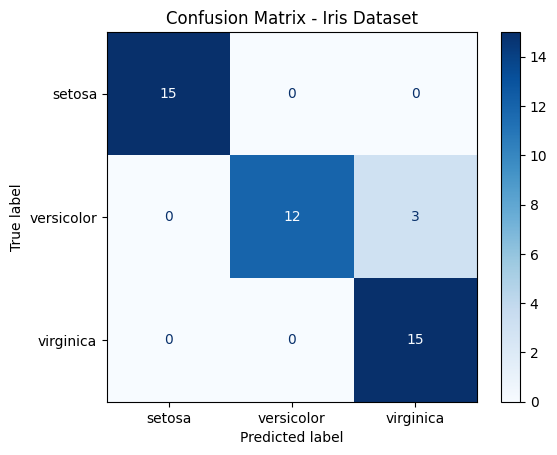

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

try:
    # Load Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # Check for missing values
    if np.isnan(X).any():
        raise ValueError("Feature data contains missing values.")
    if np.isnan(y).any():
        raise ValueError("Target data contains missing values.")
    
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Initialize and train Decision Tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict test set
    y_pred = clf.predict(X_test)
    
    # Evaluate model
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix - Iris Dataset")
    plt.show()
    
except ValueError as ve:
    print(f"Data Error: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")
